In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.datasets import sdss_corrected_spectra
from sklearn.decomposition import PCA

In [2]:
# Load SDSS spectra data
data = sdss_corrected_spectra.fetch_sdss_corrected_spectra()
spectra = sdss_corrected_spectra.reconstruct_spectra(data)
wavelengths = sdss_corrected_spectra.compute_wavelengths(data)


downloading PCA-processed SDSS spectra from https://github.com/astroML/astroML-data/raw/main/datasets/spec4000.npz to /home/brianbg/astroML_data
[=========================================]  27.15Mb / 27.15Mb   


In [3]:
# Perform PCA on the spectra
n_components = 5  # You can adjust the number of components
pca = PCA(n_components=n_components)
coeff = pca.fit_transform(spectra)


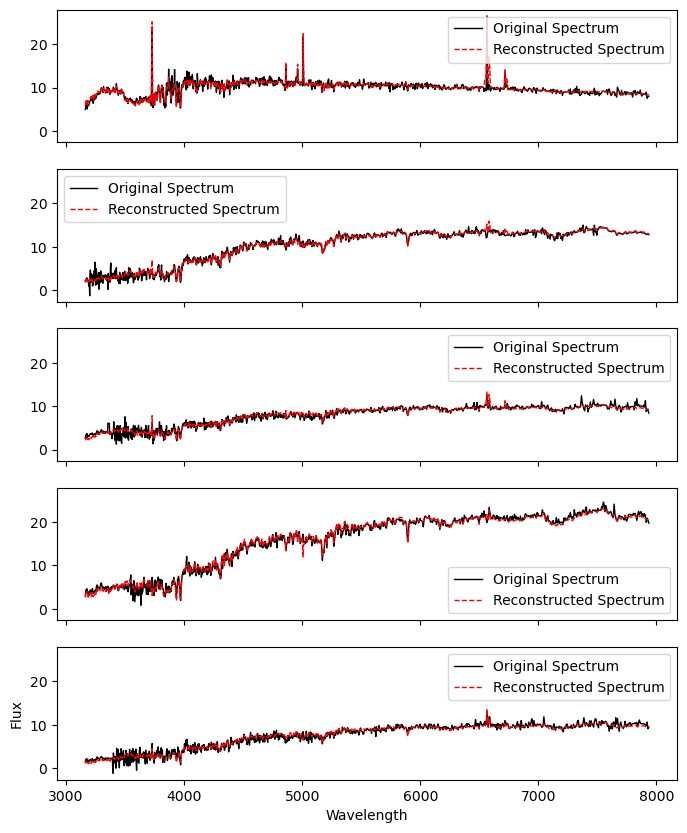

In [4]:
# Reconstruct the spectra using the PCA components
spectra_reconstructed = pca.inverse_transform(coeff)

# Plot the original and reconstructed spectra
fig, ax = plt.subplots(n_components, 1, figsize=(8, 2 * n_components),
                       sharex=True, sharey=True)
for i in range(n_components):
    ax[i].plot(wavelengths, spectra[i], label='Original Spectrum', lw=1, c='k')
    ax[i].plot(wavelengths, spectra_reconstructed[i], label='Reconstructed Spectrum', lw=1, c='r', linestyle='--')
    ax[i].legend()

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()


In [5]:
# Here, I'm creating a simple example with random data
np.random.seed(42)
num_samples = 100
num_features = 200
spectra_data = np.random.rand(num_samples, num_features)

In [6]:
# Perform PCA on the spectra
n_components = 5  # You can adjust the number of components
pca = PCA(n_components=n_components)
coeff = pca.fit_transform(spectra_data)


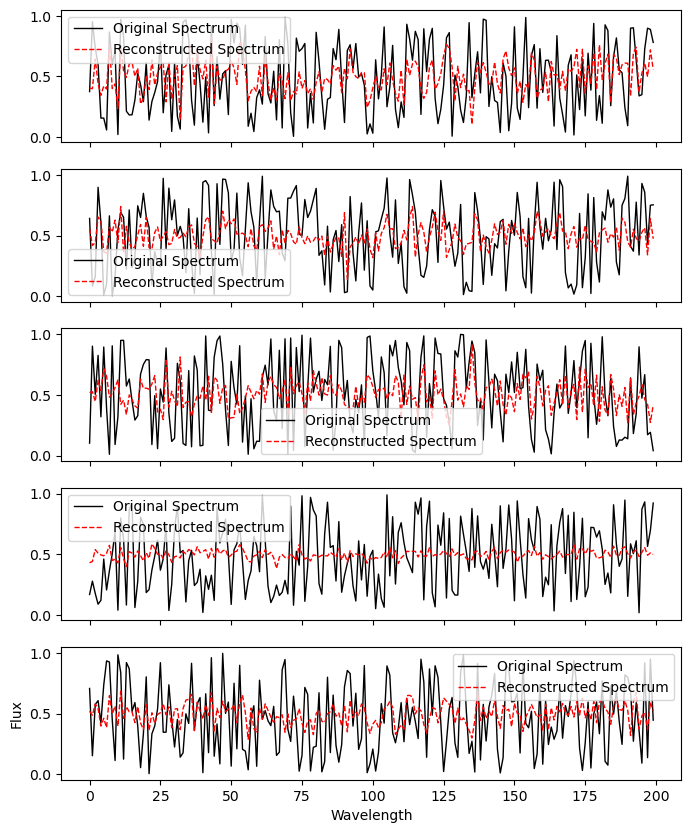

In [7]:
# Reconstruct the spectra using the PCA components
spectra_reconstructed = pca.inverse_transform(coeff)

# Plot the original and reconstructed spectra
fig, ax = plt.subplots(n_components, 1, figsize=(8, 2 * n_components),
                       sharex=True, sharey=True)
for i in range(n_components):
    ax[i].plot(spectra_data[i], label='Original Spectrum', lw=1, c='k')
    ax[i].plot(spectra_reconstructed[i], label='Reconstructed Spectrum', lw=1, c='r', linestyle='--')
    ax[i].legend()

plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()

In [11]:
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
num_train_samples = 100
num_features = 200
train_spectra_data = np.random.rand(num_train_samples, num_features)

# Here, I'm creating a simple example with random testing data
num_test_samples = 20
test_spectra_data = np.random.rand(num_test_samples, num_features)

# Standardize the training and testing spectra
scaler = StandardScaler()
train_spectra_std = scaler.fit_transform(train_spectra_data)
test_spectra_std = scaler.transform(test_spectra_data)

# Perform PCA on the standardized training spectra
n_components = 5  # You can adjust the number of components
pca = PCA(n_components=n_components)
train_coeff = pca.fit_transform(train_spectra_std)

# Reconstruct the standardized testing spectra using the PCA components learned from training
test_spectra_reconstructed_std = pca.inverse_transform(pca.transform(test_spectra_std))


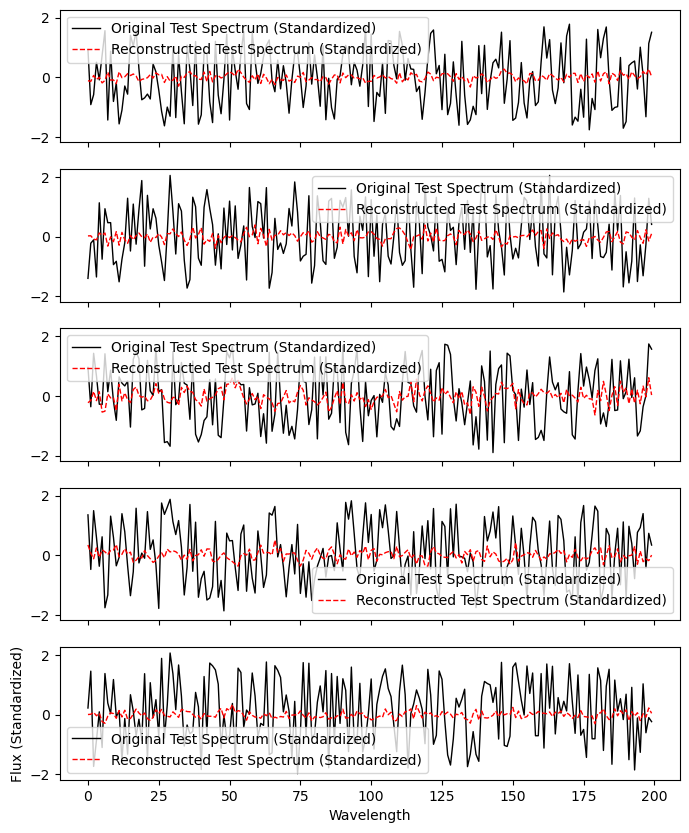

In [12]:
fig, ax = plt.subplots(n_components, 1, figsize=(8, 2 * n_components),
                       sharex=True, sharey=True)
for i in range(n_components):
    ax[i].plot(test_spectra_std[i], label='Original Test Spectrum (Standardized)', lw=1, c='k')
    ax[i].plot(test_spectra_reconstructed_std[i], label='Reconstructed Test Spectrum (Standardized)', lw=1, c='r', linestyle='--')
    ax[i].legend()

plt.xlabel('Wavelength')
plt.ylabel('Flux (Standardized)')
plt.show()
